In [1]:
!pip install -q kaggle split-folders tensorflow

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import splitfolders
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kajujaiswal652","key":"f6763bf216acfd61727b875eee22b3a5"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d omkargurav/face-mask-dataset
!unzip -o face-mask-dataset.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/data/with_mask/with_mask_3297.jpg  
  inflating: /content/data/with_mask/with_mask_3298.jpg  
  inflating: /content/data/with_mask/with_mask_3299.jpg  
  inflating: /content/data/with_mask/with_mask_33.jpg  
  inflating: /content/data/with_mask/with_mask_330.jpg  
  inflating: /content/data/with_mask/with_mask_3300.jpg  
  inflating: /content/data/with_mask/with_mask_3301.jpg  
  inflating: /content/data/with_mask/with_mask_3302.jpg  
  inflating: /content/data/with_mask/with_mask_3303.jpg  
  inflating: /content/data/with_mask/with_mask_3304.jpg  
  inflating: /content/data/with_mask/with_mask_3305.jpg  
  inflating: /content/data/with_mask/with_mask_3306.jpg  
  inflating: /content/data/with_mask/with_mask_3307.jpg  
  inflating: /content/data/with_mask/with_mask_3308.jpg  
  inflating: /content/data/with_mask/with_mask_3309.jpg  
  inflating: /content/data/with_mask/with_mask_331.jpg  
  inflating: /content/dat

In [6]:
!mv "/content/Face Mask Dataset" /content/data

mv: cannot stat '/content/Face Mask Dataset': No such file or directory


In [7]:
splitfolders.ratio("/content/data", output="/content/split_data", seed=42, ratio=(.8, .1, .1), move=False)


Copying files: 7553 files [00:01, 6691.75 files/s]


In [8]:
train_dir = "/content/split_data/train"
val_dir = "/content/split_data/val"
test_dir = "/content/split_data/test"


In [9]:
img_size = 128
batch_size = 32

In [10]:
train_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [11]:
train_data = train_gen.flow_from_directory(train_dir, target_size=(img_size, img_size), class_mode='categorical', batch_size=batch_size)
val_data = val_gen.flow_from_directory(val_dir, target_size=(img_size, img_size), class_mode='categorical', batch_size=batch_size)
test_data = test_gen.flow_from_directory(test_dir, target_size=(img_size, img_size), class_mode='categorical', batch_size=batch_size)


Found 6042 images belonging to 2 classes.
Found 754 images belonging to 2 classes.
Found 757 images belonging to 2 classes.


In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 78/189 ━━━━━━━━━━━━━━━━━━━━ 1:07 612ms/step - accuracy: 0.6805 - loss: 0.6158

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


183/189 ━━━━━━━━━━━━━━━━━━━━ 3s 636ms/step - accuracy: 0.7641 - loss: 0.4859

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.7666 - loss: 0.4818

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


189/189 ━━━━━━━━━━━━━━━━━━━━ 126s 662ms/step - accuracy: 0.7670 - loss: 0.4812 - val_accuracy: 0.9019 - val_loss: 0.2387
Epoch 2/10
 39/189 ━━━━━━━━━━━━━━━━━━━━ 1:37 653ms/step - accuracy: 0.8947 - loss: 0.2605

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 48/189 ━━━━━━━━━━━━━━━━━━━━ 1:30 645ms/step - accuracy: 0.8942 - loss: 0.2590

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 124s 657ms/step - accuracy: 0.8973 - loss: 0.2458 - val_accuracy: 0.9231 - val_loss: 0.2039
Epoch 3/10
 31/189 ━━━━━━━━━━━━━━━━━━━━ 1:40 633ms/step - accuracy: 0.9174 - loss: 0.2071

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


147/189 ━━━━━━━━━━━━━━━━━━━━ 26s 620ms/step - accuracy: 0.9088 - loss: 0.2178

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 122s 643ms/step - accuracy: 0.9094 - loss: 0.2161 - val_accuracy: 0.9231 - val_loss: 0.2175
Epoch 4/10
  2/189 ━━━━━━━━━━━━━━━━━━━━ 1:47 574ms/step - accuracy: 0.9688 - loss: 0.1177

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 27/189 ━━━━━━━━━━━━━━━━━━━━ 1:39 612ms/step - accuracy: 0.9442 - loss: 0.1478

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 120s 636ms/step - accuracy: 0.9281 - loss: 0.1762 - val_accuracy: 0.9483 - val_loss: 0.1657
Epoch 5/10
 82/189 ━━━━━━━━━━━━━━━━━━━━ 1:05 613ms/step - accuracy: 0.9561 - loss: 0.1328

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


143/189 ━━━━━━━━━━━━━━━━━━━━ 28s 622ms/step - accuracy: 0.9503 - loss: 0.1412

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 122s 647ms/step - accuracy: 0.9474 - loss: 0.1461 - val_accuracy: 0.9483 - val_loss: 0.1648
Epoch 6/10
111/189 ━━━━━━━━━━━━━━━━━━━━ 50s 648ms/step - accuracy: 0.9457 - loss: 0.1498

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


118/189 ━━━━━━━━━━━━━━━━━━━━ 46s 649ms/step - accuracy: 0.9456 - loss: 0.1501

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 144s 659ms/step - accuracy: 0.9453 - loss: 0.1511 - val_accuracy: 0.9416 - val_loss: 0.1629
Epoch 7/10
 67/189 ━━━━━━━━━━━━━━━━━━━━ 1:15 619ms/step - accuracy: 0.9501 - loss: 0.1455

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


168/189 ━━━━━━━━━━━━━━━━━━━━ 13s 620ms/step - accuracy: 0.9518 - loss: 0.1391

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 121s 641ms/step - accuracy: 0.9519 - loss: 0.1384 - val_accuracy: 0.9469 - val_loss: 0.1565
Epoch 8/10
 36/189 ━━━━━━━━━━━━━━━━━━━━ 1:35 623ms/step - accuracy: 0.9691 - loss: 0.0935

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 92/189 ━━━━━━━━━━━━━━━━━━━━ 1:00 620ms/step - accuracy: 0.9664 - loss: 0.1002

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 121s 641ms/step - accuracy: 0.9615 - loss: 0.1101 - val_accuracy: 0.9509 - val_loss: 0.1344
Epoch 9/10
139/189 ━━━━━━━━━━━━━━━━━━━━ 30s 614ms/step - accuracy: 0.9705 - loss: 0.0886

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


157/189 ━━━━━━━━━━━━━━━━━━━━ 19s 615ms/step - accuracy: 0.9701 - loss: 0.0891

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 121s 638ms/step - accuracy: 0.9693 - loss: 0.0905 - val_accuracy: 0.9615 - val_loss: 0.1368
Epoch 10/10
 42/189 ━━━━━━━━━━━━━━━━━━━━ 1:28 605ms/step - accuracy: 0.9740 - loss: 0.0827

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


186/189 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step - accuracy: 0.9712 - loss: 0.0845

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 119s 631ms/step - accuracy: 0.9712 - loss: 0.0846 - val_accuracy: 0.9589 - val_loss: 0.1427


In [16]:
loss, accuracy = model.evaluate(test_data)
print(f"✅ Test Accuracy: {accuracy*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.9672 - loss: 0.1187
✅ Test Accuracy: 96.04%


In [17]:
model.save("mask_detector_model.h5")

In [18]:
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

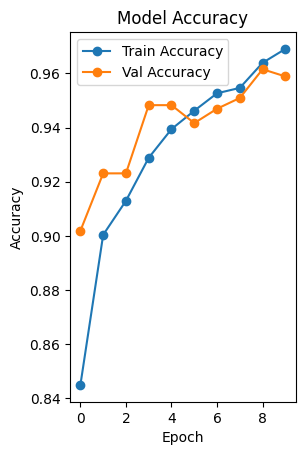

In [19]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

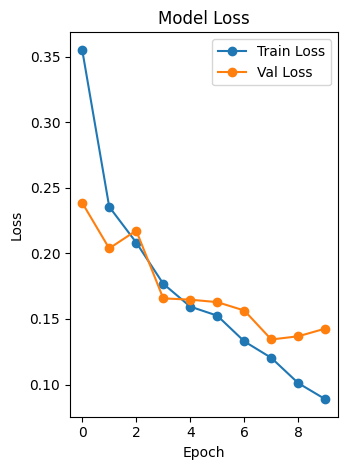

In [23]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [25]:
y_true = test_data.classes
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step


In [26]:
class_labels = list(test_data.class_indices.keys())

In [27]:
print("📄 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

📄 Classification Report:

              precision    recall  f1-score   support

   with_mask       0.54      0.57      0.55       373
without_mask       0.56      0.52      0.54       384

    accuracy                           0.55       757
   macro avg       0.55      0.55      0.55       757
weighted avg       0.55      0.55      0.55       757



In [28]:
cm = confusion_matrix(y_true, y_pred)

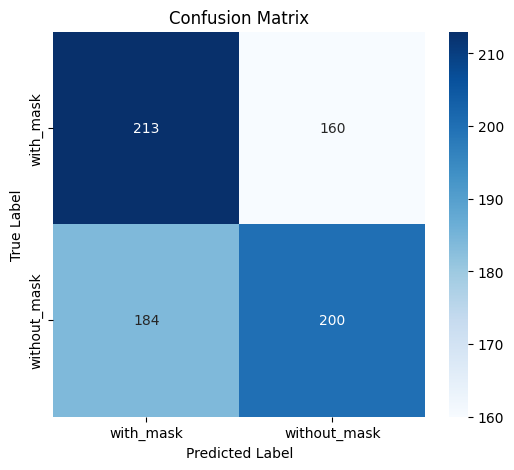

In [29]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()